In [2]:
import pandas as pd 
import numpy as np 

train_data_path = '/home/pranjal/Downloads/TRAIN.csv'
train_data = pd.read_csv(train_data_path)

train_data.head()

,Item code,Category,State,29-01-2017,30-01-2017,31-01-2017,01-02-2017,02-02-2017,03-02-2017,04-02-2017,...,13-02-2022,14-02-2022,15-02-2022,16-02-2022,17-02-2022,18-02-2022,19-02-2022,20-02-2022,21-02-2022,22-02-2022
0,ANTIDIABETIC_001,ANTIDIABETIC,MH,0,0,0,0,0,0,0,...,4,0,0,0,0,1,1,2,0,4
1,ANTIDIABETIC_002,ANTIDIABETIC,MH,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,ANTIDIABETIC_003,ANTIDIABETIC,MH,0,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,1,0
3,ANTIDIABETIC_004,ANTIDIABETIC,MH,0,0,0,0,0,0,0,...,2,1,0,0,0,2,0,5,4,2
4,ANTIDIABETIC_005,ANTIDIABETIC,MH,0,0,0,0,0,0,0,...,5,2,2,2,1,0,0,0,3,0


In [4]:
#convert the data set from wide to long format 

data_long = pd.melt(train_data, id_vars =['Item code','Category', 'State'],var_name ='Date', value_name='Sales')
data_long

,Item code,Category,State,Date,Sales
0,ANTIDIABETIC_001,ANTIDIABETIC,MH,29-01-2017,0
1,ANTIDIABETIC_002,ANTIDIABETIC,MH,29-01-2017,0
2,ANTIDIABETIC_003,ANTIDIABETIC,MH,29-01-2017,0
3,ANTIDIABETIC_004,ANTIDIABETIC,MH,29-01-2017,0
4,ANTIDIABETIC_005,ANTIDIABETIC,MH,29-01-2017,0
...,...,...,...,...,...
6463687,ANTIBIOTIC_215,ANTIBIOTIC,TN,22-02-2022,1
6463688,ANTIBIOTIC_216,ANTIBIOTIC,TN,22-02-2022,1
6463689,ANTIBIOTIC_217,ANTIBIOTIC,TN,22-02-2022,0
6463690,ANTIBIOTIC_218,ANTIBIOTIC,TN,22-02-2022,7


In [5]:
import pandas as pd
# Read the CSV file
data = pd.read_csv('TRAIN.csv')
# Melt the dataframe to unpivot the date columns into rows
melted_data = pd.melt(data, id_vars=['Item code', 'Category', 'State'], var_name='Date', value_name='Sales')
# Convert the 'Date' column to datetime format
melted_data['Date'] = pd.to_datetime(melted_data['Date'], format='%d-%m-%Y')
# Reshape the data using pivot_table
reshaped_data = melted_data.pivot_table(index=['Date', 'Item code', 'Category'], columns='State', values='Sales', fill_value=0).reset_index()
# Save the reshaped data to a new CSV file
reshaped_data.to_csv('reshaped_data.csv', index=False)


In [6]:
# Aggregating sales data by date for each state to create a time series dataframe with columns as requested
# First, ensure data_long includes only the relevant states and dates are in the correct format
data_long['Date'] = pd.to_datetime(data_long['Date'], errors='coerce')

# Aggregate sales by date and state
data_grouped = data_long.groupby(['Date', 'State'])['Sales'].sum().unstack().reset_index()

# Rename columns to match the required format: C1 = Date, C2 = MH sales, C3 = UP sales, C4 = TN sales
data_grouped.columns = ['C1', 'MH', 'TN', 'UP']

# Display the first few rows to verify the transformation
data_grouped.head()

/tmp/ipykernel_90443/3914133782.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data_long['Date'] = pd.to_datetime(data_long['Date'], errors='coerce')


,C1,MH,TN,UP
0,2017-01-29,1186,1301,811
1,2017-01-30,1123,1012,772
2,2017-01-31,902,721,474
3,2017-02-01,836,408,631
4,2017-02-02,640,0,395


In [7]:
data_grouped

,C1,MH,TN,UP
0,2017-01-29,1186,1301,811
1,2017-01-30,1123,1012,772
2,2017-01-31,902,721,474
3,2017-02-01,836,408,631
4,2017-02-02,640,0,395
...,...,...,...,...
1846,2022-02-18,1411,1071,1087
1847,2022-02-19,1685,1298,1237
1848,2022-02-20,1888,1975,1452
1849,2022-02-21,2025,1555,1668


In [8]:
data_grouped.tail(369)

,C1,MH,TN,UP
1482,2021-02-19,1187,855,1111
1483,2021-02-20,1548,1234,1182
1484,2021-02-21,1691,1819,1629
1485,2021-02-22,1962,1541,1710
1486,2021-02-23,1256,1010,1198
...,...,...,...,...
1846,2022-02-18,1411,1071,1087
1847,2022-02-19,1685,1298,1237
1848,2022-02-20,1888,1975,1452
1849,2022-02-21,2025,1555,1668


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming data_grouped is your transformed DataFrame with columns C1, MH, TN, and UP

# Prepare data for LSTM
dates = data_grouped['C1'].values.reshape(-1, 1)
sales_data = data_grouped[['MH', 'TN', 'UP']].values

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_sales_data = scaler.fit_transform(sales_data)

# Define function to create sequences for LSTM
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

# Define sequence length
sequence_length = 7  # You can adjust this based on your preference

# Create sequences for LSTM
X, y = create_sequences(scaled_sales_data, sequence_length)

# Split data into train and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(3)  # Output layer with 3 neurons for MH, TN, and UP
])
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

2024-02-19 12:13:44.294978: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-19 12:13:44.295068: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-19 12:13:44.302609: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-19 12:13:44.330646: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-19 12:13:48.484510: W tensorflow/compiler/tf2

Epoch 1/100
47/47 [==============================] - 5s 11ms/step - loss: 0.1412
Epoch 2/100
47/47 [==============================] - 1s 14ms/step - loss: 0.0120
Epoch 3/100
47/47 [==============================] - 1s 15ms/step - loss: 0.0109
Epoch 4/100
47/47 [==============================] - 1s 17ms/step - loss: 0.0104
Epoch 5/100
47/47 [==============================] - 1s 14ms/step - loss: 0.0099
Epoch 6/100
47/47 [==============================] - 1s 13ms/step - loss: 0.0090
Epoch 7/100
47/47 [==============================] - 1s 14ms/step - loss: 0.0080
Epoch 8/100
47/47 [==============================] - 1s 13ms/step - loss: 0.0068
Epoch 9/100
47/47 [==============================] - 1s 12ms/step - loss: 0.0059
Epoch 10/100
47/47 [==============================] - 1s 13ms/step - loss: 0.0059
Epoch 11/100
47/47 [==============================] - 1s 13ms/step - loss: 0.0051
Epoch 12/100
47/47 [==============================] - 1s 13ms/step - loss: 0.0050
Epoch 13/100
47/47 [=====

In [10]:
y_pred=model.predict(X_test)

12/12 [==============================] - 1s 9ms/step


In [11]:
y_pred #ytest=actual sales

array([[0.523573  , 0.44143343, 0.56935227],
       [0.5932913 , 0.54159594, 0.613335  ],
       [0.7342816 , 0.6421899 , 0.7272863 ],
       ...,
       [0.8168941 , 0.7586421 , 0.7341642 ],
       [0.7542704 , 0.5754583 , 0.7696497 ],
       [0.6585686 , 0.4657428 , 0.68634653]], dtype=float32)

In [12]:
#y_p = scaler.inverse_transform(y_pred)
#y_p
#len(y_p)

In [13]:
#test_dates = pd.date_range(start='2021-02-19', periods=369, freq='D')
#last_sequence = scaled_sales_data[-sequence_length:] 
# Last sequence from the data


In [14]:
#test_pred=[]
#for _ in range(369):
 #   y_pred = model.predict(last_sequence.reshape(1, sequence_length, 3))[0]
  #  test_pred.append(y_pred)
   # last_sequence = np.append(last_sequence[1:], prediction.reshape(1, 3), axis=0)

In [15]:
# Invert the scaling to get the actual sales values
#fo = scaler.inverse_transform(test_pred)
#fo

In [73]:
#test_df = pd.DataFrame(fo, columns=['MH', 'TN', 'UP'], index=test_dates)

In [16]:
#test_df

In [20]:
# Make predictions for the next 90 days
test_dates = pd.date_range(start='2021-02-19', periods=369, freq='D')
last_sequence = scaled_sales_data[-sequence_length:]  # Last sequence from the data
forecast1 = []

for _ in range(369):
    prediction1 = model.predict(last_sequence.reshape(1, sequence_length, 3))[0]
    forecast1.append(prediction1)
    last_sequence = np.append(last_sequence[1:], prediction1.reshape(1, 3), axis=0)

# Invert the scaling to get the actual sales values
forecast1 = scaler.inverse_transform(forecast1)

# Create a DataFrame for the forecast
forecast_df1 = pd.DataFrame(forecast1, columns=['MH', 'TN', 'UP'], index=test_dates)

# Display the forecast DataFrame
print(forecast_df1)

1/1 [==============================] - 0s 85ms/step
                     MH           TN           UP
2021-02-19  1273.188102   906.085126   976.757888
2021-02-20  1273.870313   987.992173   950.486670
2021-02-21  1314.391996  1042.395503   999.948096
2021-02-22  1547.084717  1262.264439  1108.266331
2021-02-23  2003.307735  1863.683421  1346.711536
...                 ...          ...          ...
2022-02-18   760.070862   674.534035   491.297924
2022-02-19   760.070787   674.534035   491.297924
2022-02-20   760.070787   674.534035   491.297924
2022-02-21   760.070787   674.534035   491.297924
2022-02-22   760.070862   674.534035   491.297924

[369 rows x 3 columns]


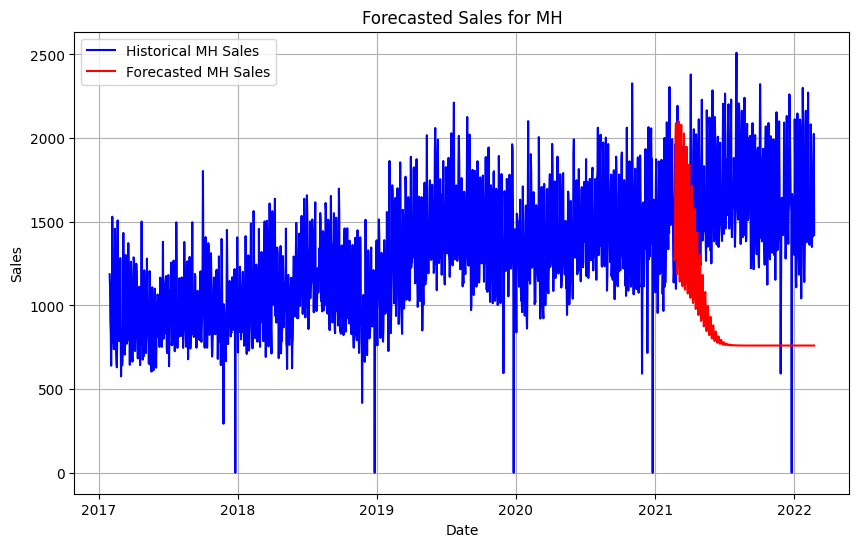

In [21]:
import matplotlib.pyplot as plt

# Plot historical data
plt.figure(figsize=(10, 6))
plt.plot(data_grouped['C1'], data_grouped['MH'], label='Historical MH Sales', color='blue')

# Plot forecasted part in a different color
plt.plot(forecast_df1.index,forecast_df1['MH'], label='Forecasted MH Sales', color='red')

plt.title('Forecasted Sales for MH')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [53]:
# Make predictions for the next 90 days
future_dates = pd.date_range(start=dates[-1][0], periods=90, freq='D')
last_sequence = scaled_sales_data[-sequence_length:]  # Last sequence from the data
forecast = []

for _ in range(90):
    prediction = model.predict(last_sequence.reshape(1, sequence_length, 3))[0]
    forecast.append(prediction)
    last_sequence = np.append(last_sequence[1:], prediction.reshape(1, 3), axis=0)

# Invert the scaling to get the actual sales values
forecast = scaler.inverse_transform(forecast)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame(forecast, columns=['MH', 'TN', 'UP'], index=future_dates)

# Display the forecast DataFrame
print(forecast_df)

1/1 [==============================] - 0s 99ms/step
                     MH           TN           UP
2022-02-22  1305.755595   920.739454  1040.314089
2022-02-23  1322.486070  1010.203772  1047.491304
2022-02-24  1382.714672  1071.883053  1102.573253
2022-02-25  1621.424762  1352.095806  1254.852031
2022-02-26  2170.938928  1849.415224  1621.459239
...                 ...          ...          ...
2022-05-18   959.496524   653.872293  1160.712104
2022-05-19   823.509670   912.804961  1157.510773
2022-05-20   946.171568  1449.876399  1485.865571
2022-05-21  1616.155879  2702.163862  2691.829593
2022-05-22  3241.272061  4477.280102  5084.951476

[90 rows x 3 columns]


In [25]:
forecast_df

,MH,TN,UP
2022-02-22,1332.341175,941.163722,1042.364511
2022-02-23,1304.290637,994.030315,999.882107
2022-02-24,1313.876897,1030.469701,1024.273252
2022-02-25,1523.595417,1247.329633,1145.184807
2022-02-26,2034.238520,1818.612695,1448.287768
...,...,...,...
2022-05-18,1096.885650,771.883107,827.024566
2022-05-19,1071.517876,785.655520,805.905721
2022-05-20,1120.915931,851.508583,835.963572
2022-05-21,1248.350164,965.127294,917.900852


In [23]:
forecast_df.to_csv("/home/pranjal/Downloads/forecast90.csv")

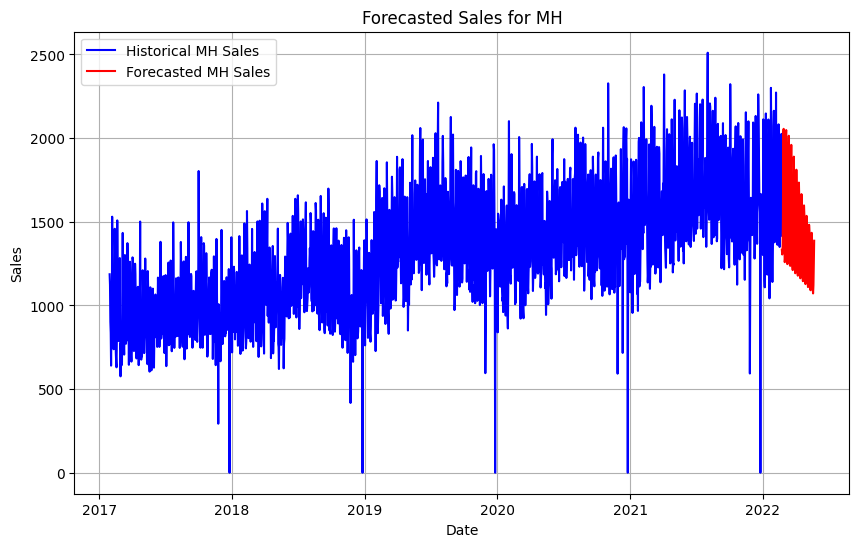

In [35]:
import matplotlib.pyplot as plt

# Plot historical data
plt.figure(figsize=(10, 6))
plt.plot(data_grouped['C1'], data_grouped['MH'], label='Historical MH Sales', color='blue')

# Plot forecasted part in a different color
plt.plot(forecast_df.index, forecast_df['MH'], label='Forecasted MH Sales', color='red')

plt.title('Forecasted Sales for MH')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


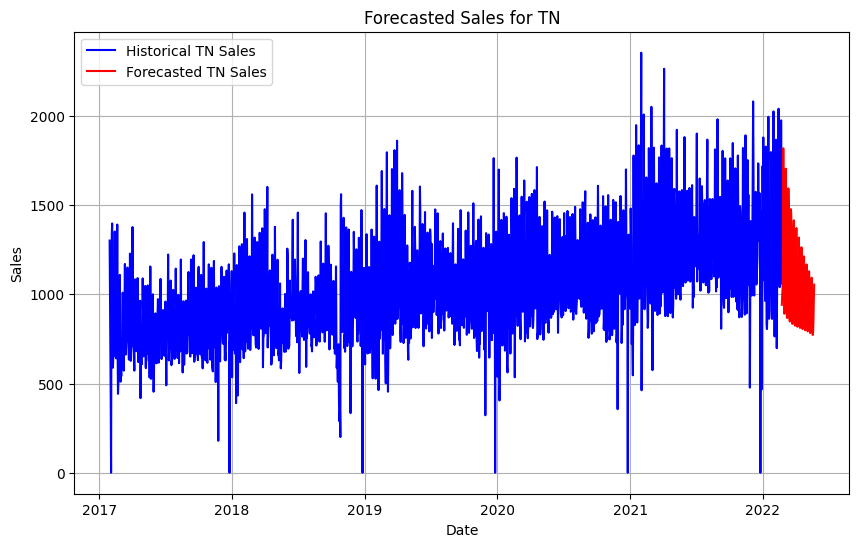

In [36]:
import matplotlib.pyplot as plt

# Plot historical data
plt.figure(figsize=(10, 6))
plt.plot(data_grouped['C1'], data_grouped['TN'], label='Historical TN Sales', color='blue')

# Plot forecasted part in a different color
plt.plot(forecast_df.index, forecast_df['TN'], label='Forecasted TN Sales', color='red')

plt.title('Forecasted Sales for TN')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


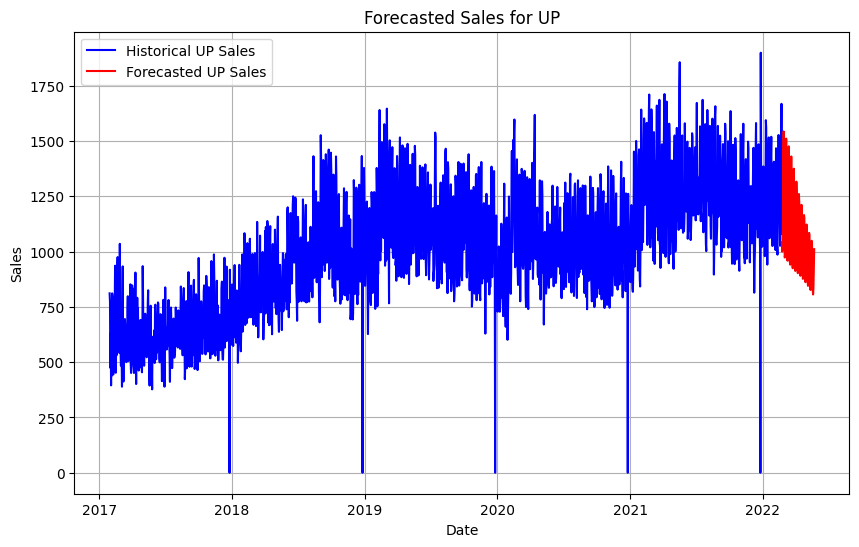

In [37]:
import matplotlib.pyplot as plt

# Plot historical data
plt.figure(figsize=(10, 6))
plt.plot(data_grouped['C1'], data_grouped['UP'], label='Historical UP Sales', color='blue')

# Plot forecasted part in a different color
plt.plot(forecast_df.index, forecast_df['UP'], label='Forecasted UP Sales', color='red')

plt.title('Forecasted Sales for UP')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


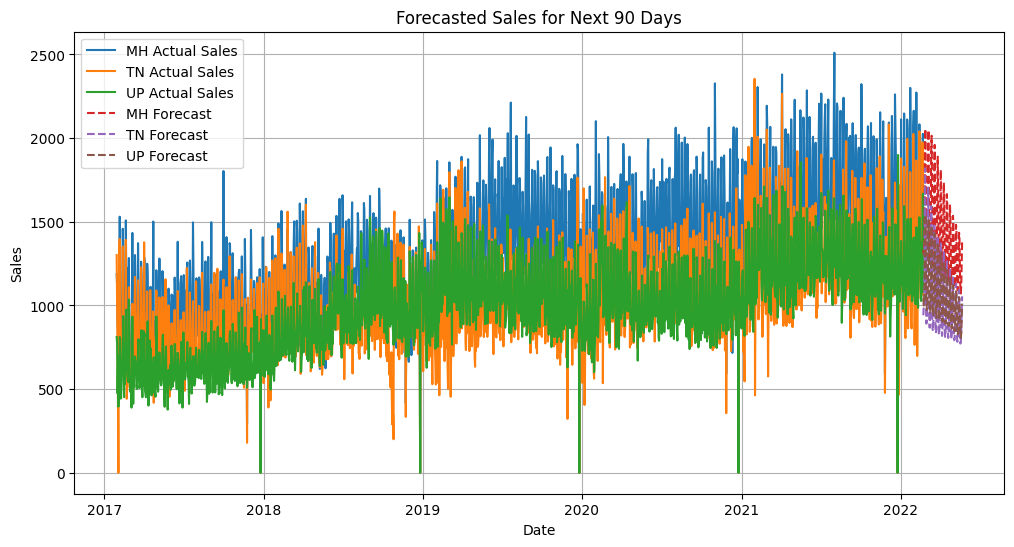

In [18]:
import matplotlib.pyplot as plt

# Plot the forecasted sales data
plt.figure(figsize=(12, 6))

# Plot the actual sales data
plt.plot(data_grouped['C1'], data_grouped['MH'], label='MH Actual Sales', )
plt.plot(data_grouped['C1'], data_grouped['TN'], label='TN Actual Sales', )
plt.plot(data_grouped['C1'], data_grouped['UP'], label='UP Actual Sales', )

# Plot the forecasted sales data
plt.plot(forecast_df.index, forecast_df['MH'], linestyle='---', label='MH Forecast', )
plt.plot(forecast_df.index, forecast_df['TN'], linestyle='---', label='TN Forecast', )
plt.plot(forecast_df.index, forecast_df['UP'], linestyle='---', label='UP Forecast', )
plt.title('Forecasted Sales for Next 90 Days')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
def calculate_wmape(actual, forecast):
    absolute_errors = np.abs(actual - forecast)
    weighted_errors = absolute_errors / np.where(actual != 0, actual, 1)  # Replace 0 with 1 to avoid division by zero
    wmape = np.sum(weighted_errors) / len(actual) * 100
    return wmape

# Calculate WMAPE
wmape = calculate_wmape(actual_sales, forecasted_sales)
print(f'Forecast error (WMAPE): {wmape:.2f}%')



Forecast error (WMAPE): 811.51%
Forecast error (WMAPE): 811.51%


AttributeError: module 'pandas' has no attribute 'product'